# Сборный проект. Изучение данных о продажах компьютерных игр интернет-магазина.

## Описание проекта


Проанализируем данные в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Выявим определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на будущий 2017 год.

*Описание данных*

Name — название игры
Platform — платформа
Year_of_Release — год выпуска
Genre — жанр игры
NA_sales — продажи в Северной Америке (миллионы проданных копий)
EU_sales — продажи в Европе (миллионы проданных копий)
JP_sales — продажи в Японии (миллионы проданных копий)
Other_sales — продажи в других странах (миллионы проданных копий)
Critic_Score — оценка критиков (максимум 100)
User_Score — оценка пользователей (максимум 10)
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


## Изучение данных 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [2]:
games = pd.read_csv('/datasets/games.csv')


In [3]:
display(games.head(10), games.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


None

In [4]:
games.columns = games.columns.str.lower()
display(games.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Заменили названия столбцов: приведили к нижнему регистру.


In [5]:
games['genre'] = games['genre'].str.lower() # название жанров тоже привели к нижнему регистру

In [6]:
games['name'].isnull().sum()/len(games)
display(games[games['name'].isnull()])

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


всего 2 строки, да и то в них мало информации: много нулей и пропусков. при удалении этих строк потеряем 0.01% информации. Удаляем.


In [7]:
games.dropna(subset=['name'],inplace=True)
display(games.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


None

In [8]:
games['year_of_release'].isnull().sum()/len(games)


0.016095255190570215

в столбце 'year_of_release' пропущено 1.6% значений. Это так же маленькая погрешность. Удалим эти строки и преобразуем год выпуска в целое число.
Столбец "user_score" переведем в float64.

In [9]:
games.dropna(subset=['year_of_release'],inplace=True)
games['year_of_release'] = games['year_of_release'].astype(int)

display(games.head(), games.info())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       9839 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.5+ MB


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


None

In [10]:
games.loc[games['user_score'] =='tbd','user_score'] = np.nan
games['user_score'] = games['user_score'].astype('float')


в столбце "user_score" значение tbd (to be determinated) - "будет определено" заменили на nan, так как пропущенных значений в этом столбце много - удалять их не будем. 

In [11]:
games['rating'] = games['rating'].fillna('no')
 

Поставим маркер на отстутвующие значения рейтинга - 'NO'

In [12]:
display(games.info(),games.describe(),games.isna().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


None

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16444.000000,16444.000000,16444.000000,16444.000000,16444.000000,7983.000000,7463.000000
mean,2006.486256,0.264012,0.145930,0.078487,0.047594,68.994363,7.126330
std,5.875525,0.818378,0.506716,0.311100,0.188005,13.920060,1.499447
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

In [13]:
games.duplicated().sum()

0

Дубликатов нет

## Анализ данных

Создадим столбец с общими продажами по каждой игре

In [14]:
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,no,40.24
2,Mario Kart Wii,Wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,no,31.38


### Посмотрим на продажи игр в разные годы


Text(0, 0.5, 'Выпущено игр')

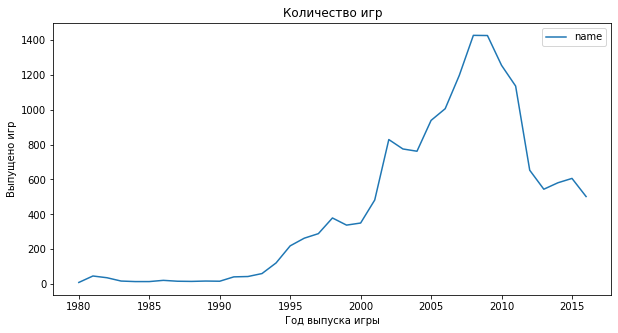

In [15]:
games_period = games.pivot_table(index='year_of_release', values='name', aggfunc='count')
plt.figure(figsize=(10,5))
sns.lineplot(data=games_period)
plt.title("Количество игр")
plt.xlabel("Год выпуска игры")
plt.ylabel("Выпущено игр")

Начиная с 1993 года начался бурный рост игровой индустрии и вплоть до 2008 года он продолжался. Потом количество выпускаемых игр упало, полагаю из-за мирового финансового кризиса 2008 года. Или из-за роста популярности игр на мобильных гаджетах.

Посмотрим отдельно на продажи по каждой платформе

Text(0, 0.5, 'Количество продаж')

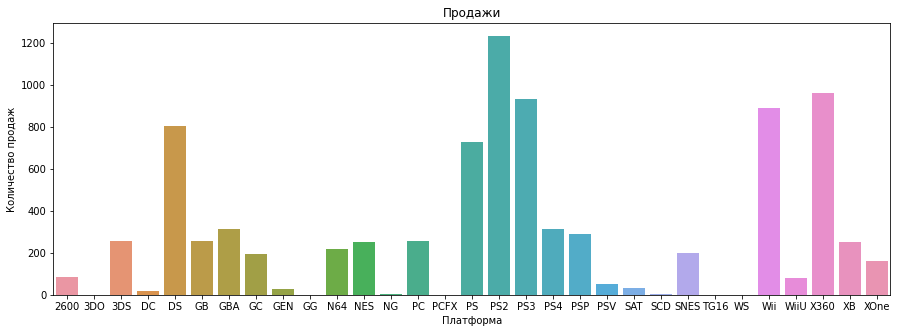

In [16]:
platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum')
plt.figure(figsize=(15,5))
sns.barplot(x=platform.index,y=platform['total_sales'])
plt.title("Продажи")
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")

Видим, что платформы с наибольшими общими продажами: PS2, X360, PS3, WII, DS, PS. Посомтрим распределение продаж по годам по каждой из этих топ-платформ.

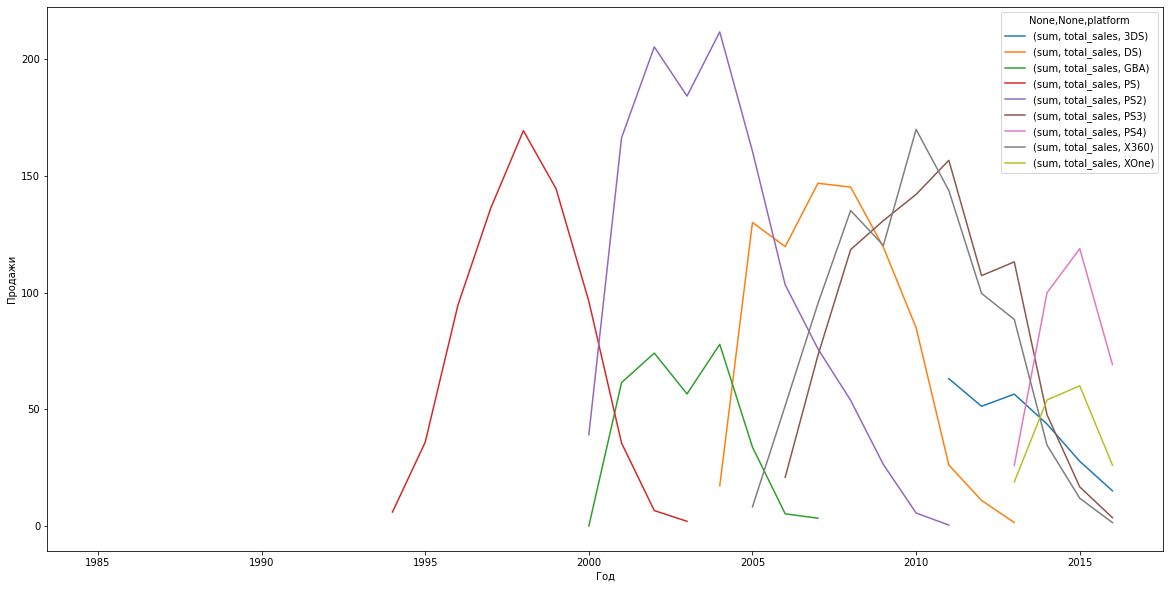

In [17]:
top_platform = games.query('platform == ["PS2", "X360", "PS3", "WII", "DS", "PS", "PS4", "XOne", "3DS", "GBA"]')
top_platforms_years = top_platform.pivot_table(index = ['year_of_release'], columns = ['platform'], values = ['total_sales'], aggfunc =  ['sum'])
top_platforms_years.plot(figsize = (20,10))

plt.xlabel("Год")
plt.ylabel("Продажи")
plt.show()



Видны яркие пики жизни каждой игры: от 8 до 11 лет. Пик продаж каждой платформы наступает  через 5 лет после ее релиза.
Таким образом, чтобы построить прогноз на продажи на 2017 год возьмем 4 года, так как нам нужны платформы, которые начинают расти или около своего пика продаж. То есть полные 2013-2015 и неполные данные 2016 года.

In [18]:
actual = games.query('year_of_release > 2012')
actual.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,shooter,6.03,5.86,0.36,2.38,NaN,NaN,no,14.63
33,Pokemon X/Pokemon Y,3DS,2013,role-playing,5.28,4.19,4.35,0.78,NaN,NaN,no,14.60
42,Grand Theft Auto V,PS4,2014,action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,role-playing,4.35,3.49,3.10,0.74,NaN,NaN,no,11.68
60,Call of Duty: Ghosts,X360,2013,shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24
69,Call of Duty: Ghosts,PS3,2013,shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
72,Minecraft,X360,2013,misc,5.70,2.65,0.02,0.81,NaN,NaN,no,9.18
77,FIFA 16,PS4,2015,sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58


In [19]:
actual['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

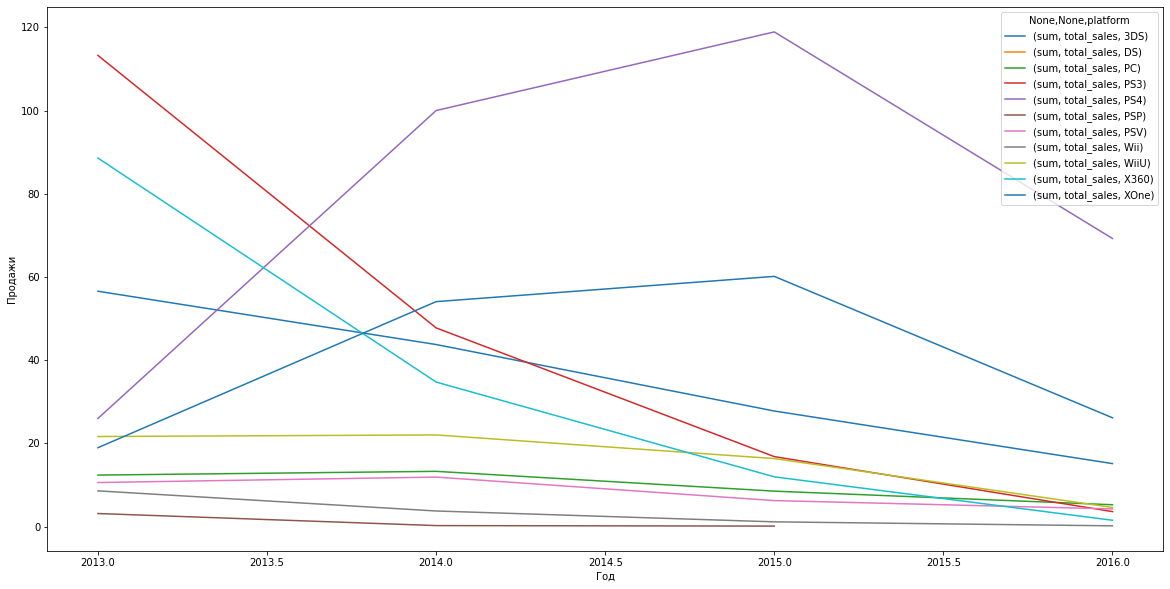

sum                                                  \
                total_sales                                                   
platform                3DS    DS     PC     PS3     PS4   PSP    PSV   Wii   
year_of_release                                                               
2013                  56.57  1.54  12.38  113.25   25.99  3.14  10.59  8.59   
2014                  43.76   NaN  13.28   47.76  100.00  0.24  11.90  3.75   
2015                  27.78   NaN   8.52   16.82  118.90  0.12   6.25  1.14   
2016                  15.14   NaN   5.25    3.60   69.25   NaN   4.25  0.18   

                                      
                                      
platform          WiiU   X360   XOne  
year_of_release                       
2013             21.65  88.58  18.96  
2014             22.03  34.74  54.07  
2015             16.35  11.96  60.14  
2016              4.60   1.52  26.15

In [20]:
top_actual =actual.pivot_table(index = ['year_of_release'], columns = ['platform'], values = ['total_sales'], aggfunc =  ['sum'])
top_actual.plot(figsize = (20,10))

plt.xlabel("Год")
plt.ylabel("Продажи")
plt.show()
top_actual.tail()

Все платформы на спаде, но PS4, XOne, 3DS - потенциально прибыльные. Добавим в этот список еще РС и WiiU. и взглянем на них отдельно.

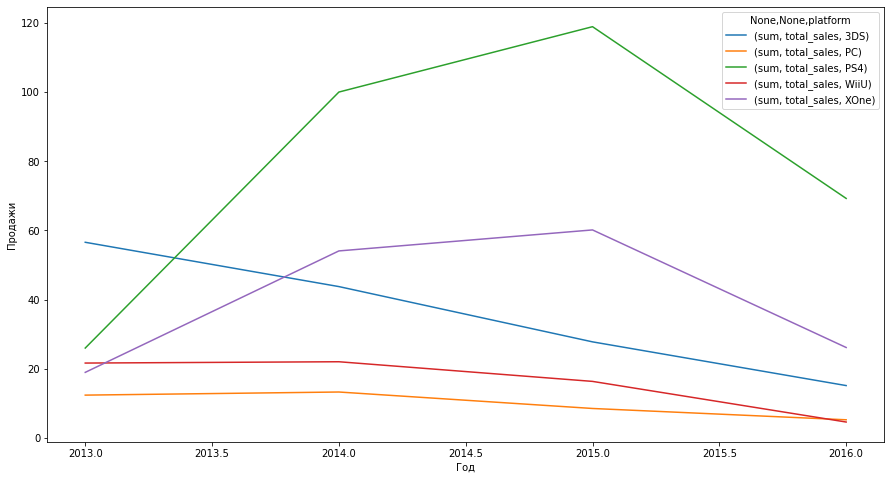

In [21]:
top_sales = actual.query('platform == ["WiiU", "PC", "PS4", "XOne", "3DS"]')
top_sales_actual = top_sales.pivot_table(index = ['year_of_release'], columns = ['platform'], values = ['total_sales'], aggfunc =  ['sum'])
top_sales_actual.plot(figsize = (15,8))

plt.xlabel("Год")
plt.ylabel("Продажи")
plt.show()


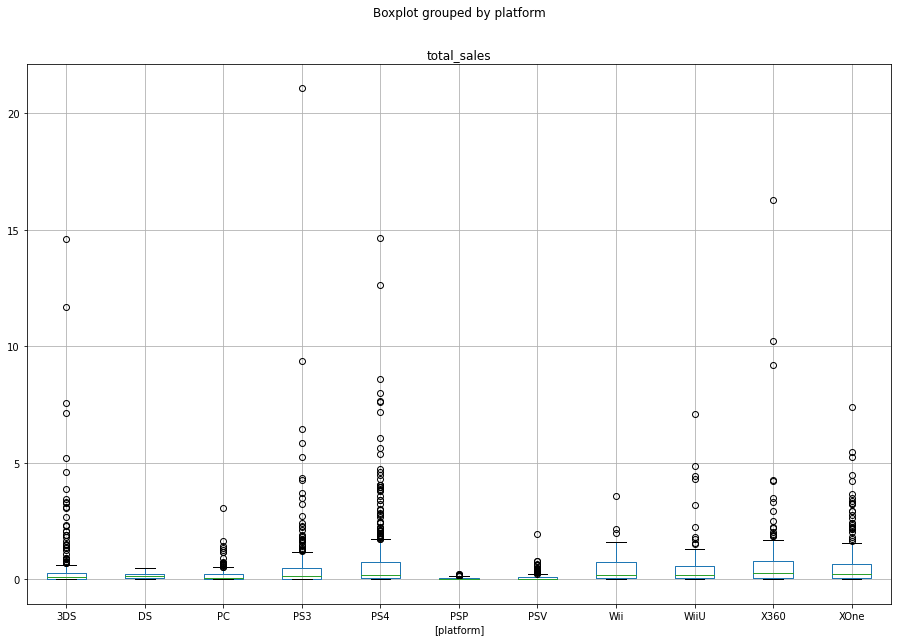

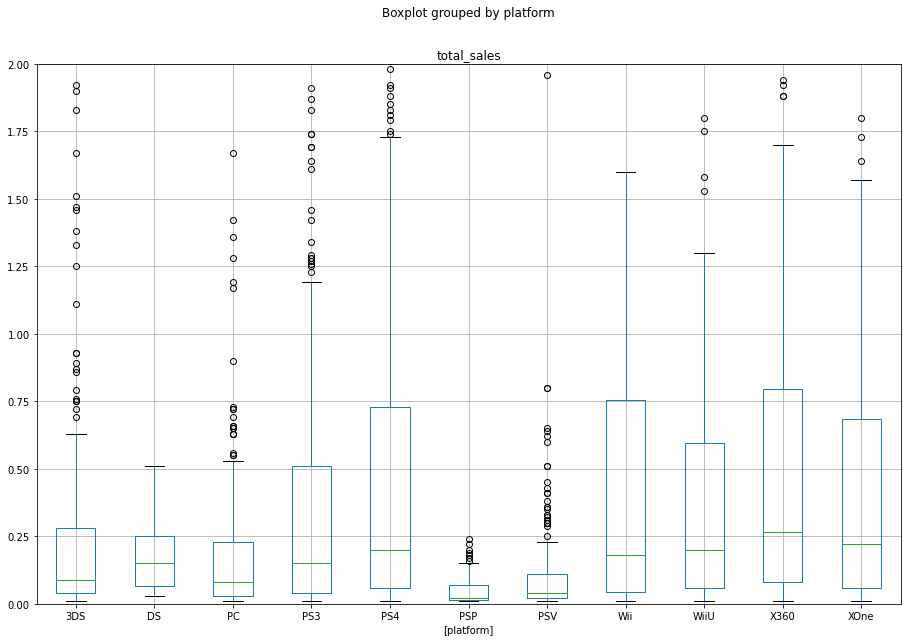

In [22]:
actual.boxplot(column = ['total_sales'],by = ['platform'],figsize=(15, 10))
plt.show()
actual.boxplot(column = ['total_sales'],by = ['platform'],figsize=(15, 10))
plt.ylim([0, 2])
plt.show()

у всех платформ медиана разная, но у PS3, PS4, Wii, WiU, X360, Xone -медианы существенно выше, но и сами ящики (диаграммы размаха) шире. и медианна смещена вниз. это нормальное поведение покупателей, когда только при выходе платформы есть интерес и, соответственно, всплеск покупок, а при затухании интереса идет и затухание продаж. Что подтверждается большим количеством выбросов у PS3, PS4, X360, XOne, 3DS.

СОздадим столбец с общими продажами по каждой игре

#### Посмотрим как оценки критиков и покупателей влияют на продажи.

Посмотрим, как влияют на продажи внутри платформы PS4 отзывы покупателей и критиков. 

'корреляция по отзывам пользователей:'

'PS4'

-0.031957110204556376

' корреляция по отзывам критиков:'

'PS4'

0.40656790206178095

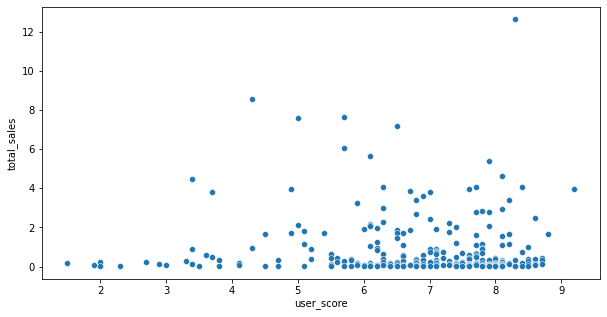

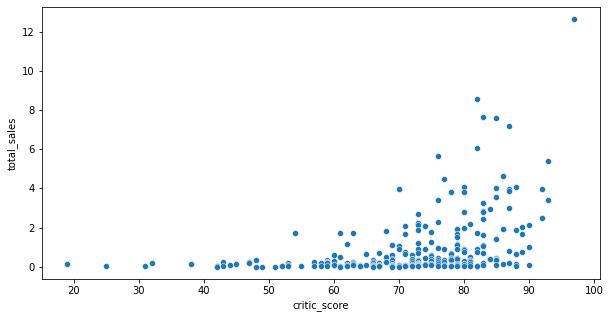

In [23]:
def other(name):
    platform = actual[actual['platform'] == name]
    corr_user = platform['user_score'].corr(platform['total_sales'])
    corr_critic = platform['critic_score'].corr(platform['total_sales'])
    plt.figure(figsize=(10,5))
    sns.scatterplot(data = platform, x = 'user_score', y = 'total_sales')
    plt.figure(figsize=(10,5))
    sns.scatterplot(data = platform, x = 'critic_score', y = 'total_sales')
    display('корреляция по отзывам пользователей:', name, corr_user)
    display(" корреляция по отзывам критиков:", name, corr_critic)
    
other('PS4')

Оценки пользователей не влияют на продажи - корреляция очень слабая и даже отрицательная, оценки критиков посильнее влияют на продажи, корреляция средняя. и при улучшении оценок критиков - увеличиваются продажи.

Посмотрим на платформы этого же производителя PS3



'корреляция по отзывам пользователей:'

'PS3'

0.0023944027357566925

' корреляция по отзывам критиков:'

'PS3'

0.3342853393371919

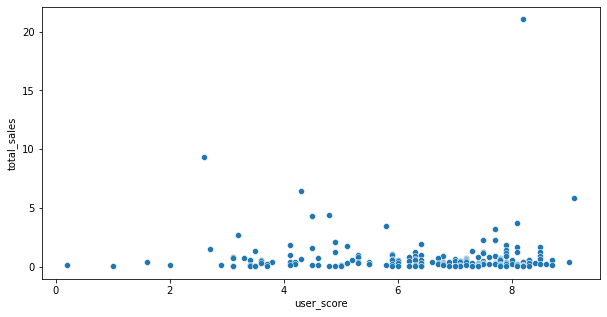

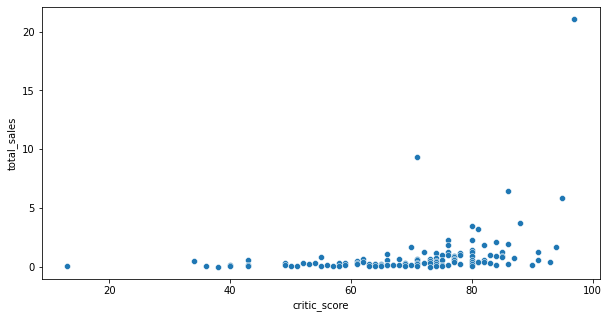

In [24]:
other('PS3')


Корреляция по отзывам пользователей также слабая. Корреляция по отзывам критиков посильнее, но также не дает права говорит о прямой зависимости продаж.
Посмотрим на другие популярные платформы

'корреляция по отзывам пользователей:'

'XOne'

-0.06892505328279414

' корреляция по отзывам критиков:'

'XOne'

0.4169983280084017

'корреляция по отзывам пользователей:'

'X360'

-0.011742185147181342

' корреляция по отзывам критиков:'

'X360'

0.3503445460228664

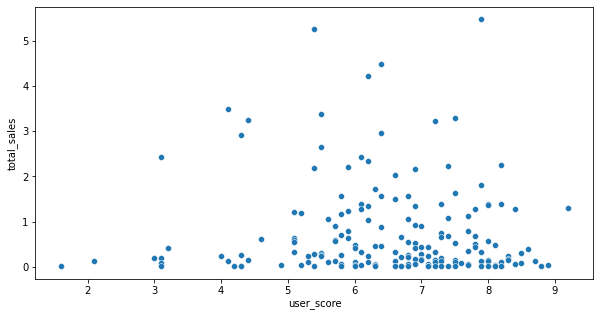

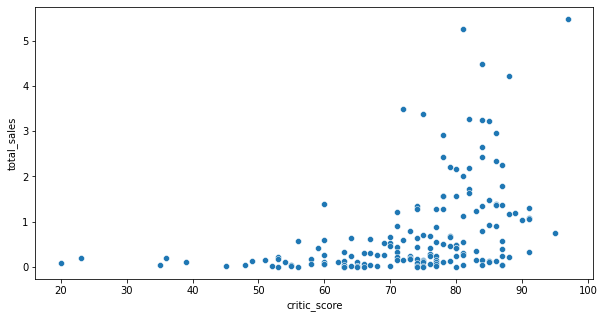

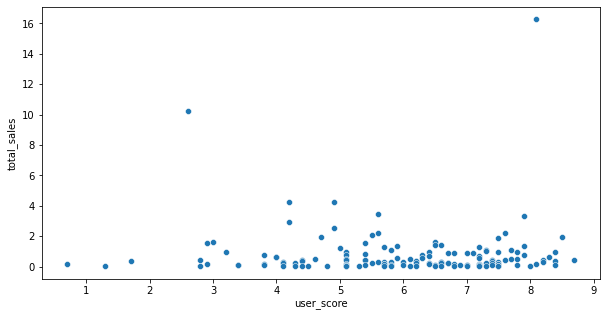

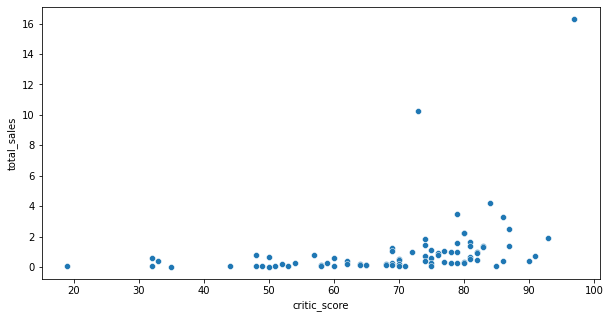

In [25]:
other('XOne')
other('X360')

'корреляция по отзывам пользователей:'

'3DS'

0.24150411773563016

' корреляция по отзывам критиков:'

'3DS'

0.3570566142288103

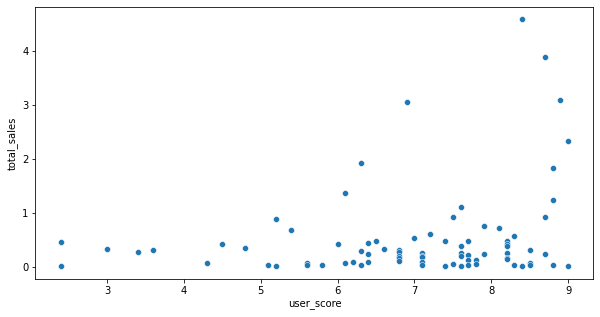

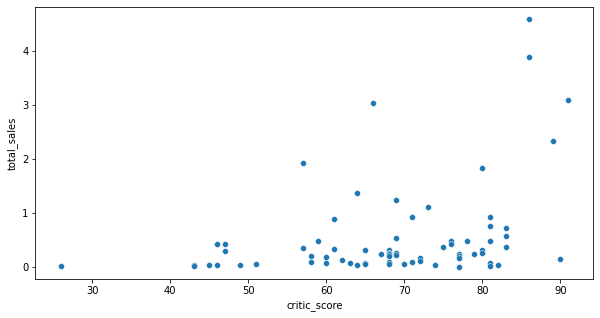

In [26]:
other('3DS')

'корреляция по отзывам пользователей:'

'WiiU'

0.4193304819266187

' корреляция по отзывам критиков:'

'WiiU'

0.3764149065423912

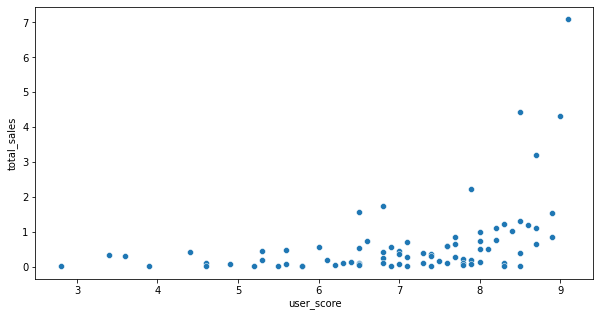

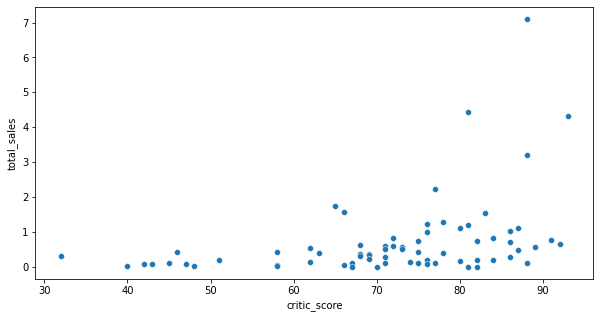

In [27]:

other('WiiU')

Зависимости примерно все такие же. Корреляция продаж от отзывов потребителей - слабая, от отзывов критиков - средняя, но не позволяет говорить о прямой зависимости. Только 'WiiU' немного выделилися - у него корреляция продаж от отзывов потребителей даже чуть выше, чем от отзывов критиков, но тоже не говорит о прямой зависимости.

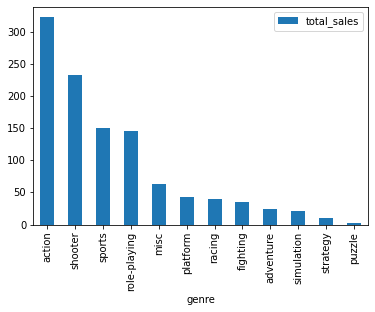

In [28]:
genre = actual.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
genre.plot(kind='bar')

plt.show()

Самые продаваемые игры - игры жанра action. Они лидируют со значительным отрывом от стрелялок и спортивных. Стратегии и паззлы - наименее из продаваемых игр.

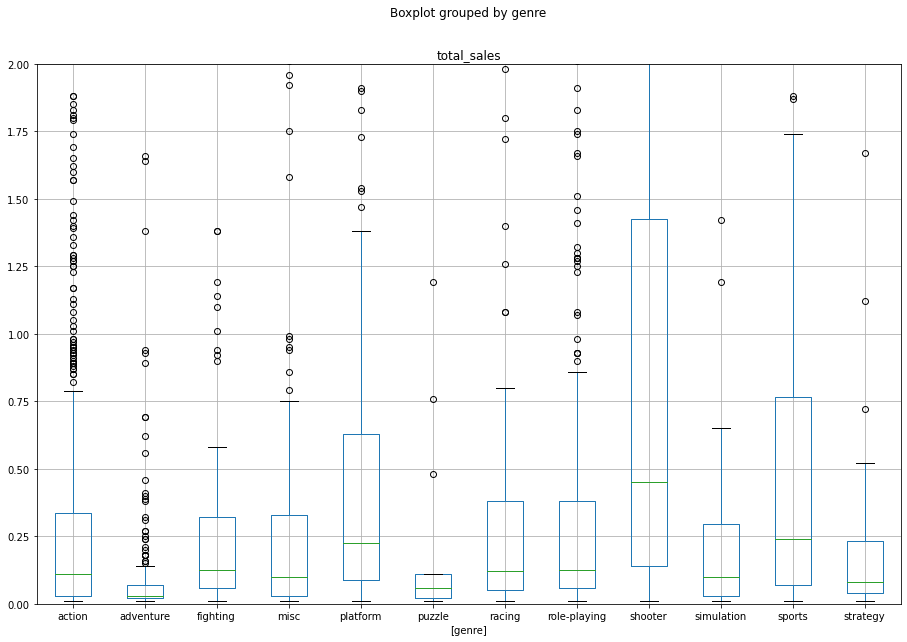

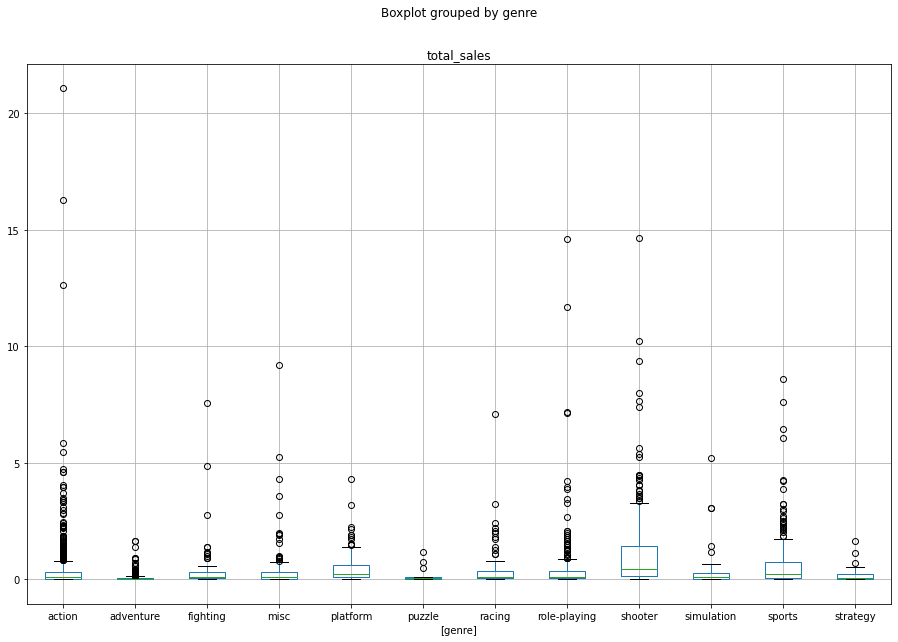

In [29]:
actual.boxplot(column = ['total_sales'],by = ['genre'],figsize=(15, 10))
plt.ylim([0, 2])
plt.show()

actual.boxplot(column = ['total_sales'],by = ['genre'],figsize=(15, 10))
plt.show()

а по медианному значению лидируют Shooter, на втором месте Platform и Sports. то есть в этих жанрах стабильно хорошие продажи. А в жанрах Action и role-playing много выбросов - то есть игр, которые очень хорошо продавались и продаются, но есть и игры с очень плохими продажами.

### Составим портрет пользователя для каждого из регионов

#### ТОП-5 продаж в каждом регионе


<div style="border:solid steelblue 1px; padding: 20px">
    
<font size="4"><p style="text-align:center"><b> </b></p></font>
    
<div style="border:solid steelblue 3px; padding: 20px">
<font size="4"><b>🍕 </b></font>
    <br /> 
        <font size="3", color = "black">
<br />
стоит выделять разделы проекта заголовками разного уровня, за уровень отвечает количество знаков #
    
        # example 1

        ### example 2

        #### example 3
    

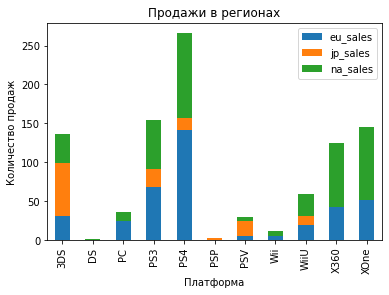

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


<AxesSubplot:title={'center':'Платформы в регионах'}, xlabel='platform', ylabel='Количество продаж'>

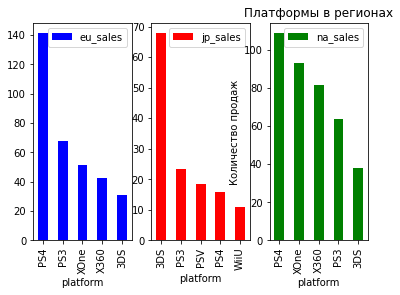

In [30]:

top_platform_region = actual.pivot_table(index='platform', values = ['na_sales','jp_sales','eu_sales'], aggfunc='sum')
top_platform_region.plot.bar(stacked=True)
plt.title("Продажи в регионах")
plt.xlabel("Платформа")
plt.ylabel("Количество продаж")
plt.show()

top5_platform_eu=actual.groupby(by='platform').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
top5_platform_jp=actual.groupby(by='platform').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
top5_platform_na=actual.groupby(by='platform').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
display(top5_platform_eu,top5_platform_jp,top5_platform_na)

fig, axes = plt.subplots(1, 3)
plt.title("Платформы в регионах")
plt.ylabel("Количество продаж")
plt.grid()
top5_platform_eu.plot.bar(ax=axes[0], color='b')
top5_platform_jp.plot.bar(ax=axes[1], color='r')
top5_platform_na.plot.bar(ax=axes[2], color='g')

В ЕВропе PS3,Х360,Wii,PS4,PC, в Японии - 3DS,DS,PS3,PSP,Wii, в Северной Америке - X360,PS3,Wii,DS,PS4. Европа И США схожи по предпочтениям пользователей.


#### ТОП-5 жанров в каждом регионе

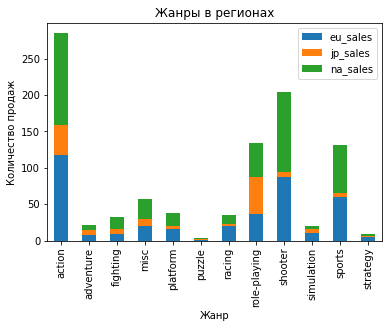

,eu_sales
genre,
action,118.13
shooter,87.86
sports,60.52
role-playing,36.97
racing,20.19


,jp_sales
genre,
role-playing,51.04
action,40.49
misc,9.20
fighting,7.65
shooter,6.61


,na_sales
genre,
action,126.05
shooter,109.74
sports,65.27
role-playing,46.40
misc,27.49


<AxesSubplot:title={'center':'Жанры в регионах'}, xlabel='genre', ylabel='Количество продаж'>

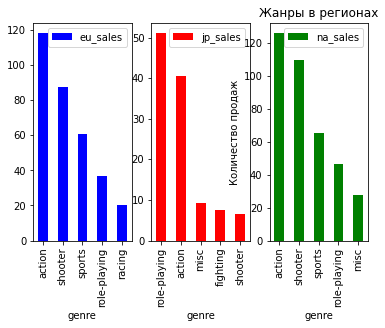

In [31]:
top_genre_region = actual.pivot_table(index='genre', values = ['na_sales','jp_sales','eu_sales'], aggfunc='sum')
top_genre_region.plot.bar(stacked=True)
plt.title("Жанры в регионах")
plt.xlabel("Жанр")
plt.ylabel("Количество продаж")
plt.show()

top5_genre_eu=actual.groupby(by='genre').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
top5_genre_jp=actual.groupby(by='genre').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
top5_genre_na=actual.groupby(by='genre').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
display(top5_genre_eu, top5_genre_jp, top5_genre_na)

fig, axes = plt.subplots(1, 3)
plt.title("Жанры в регионах")
plt.ylabel("Количество продаж")
top5_genre_eu.plot.bar(ax=axes[0], color='b')
top5_genre_jp.plot.bar(ax=axes[1], color='r')
top5_genre_na.plot.bar(ax=axes[2], color='g')

В ЕВропе и США предпочтения по жанрам игр одинаковые: action( игры, чаще от первого лица, требующие прохождения множества уровней до битвы с боссом), shooter(стрелялка, также чаще от первого лица, требующая внимания, координации), sports(имитация различных спортивных игр или соревнований), role-playing(ролевые игры), racing(гонки) и misc(игры, которые не определены по классификации).
А в Японии лидирующие жанры - другие: role-playing(ролевые игры), action, misc(игры, которые не определены по классификации), fighting(поединки), shooter.

#### ТОП-5 рейтингов

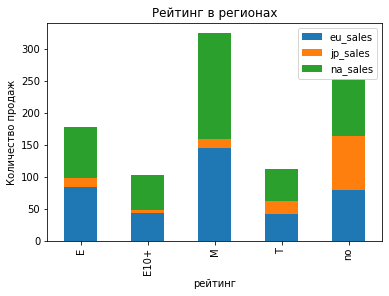

,eu_sales
rating,
M,145.32
E,83.36
no,78.91
E10+,42.69
T,41.95


,jp_sales
rating,
no,85.05
T,20.59
E,15.14
M,14.11
E10+,5.89


,na_sales
rating,
M,165.21
no,89.42
E,79.05
E10+,54.24
T,49.79


<AxesSubplot:title={'center':'Рейтинг в регионах'}, xlabel='rating', ylabel='Количество продаж'>

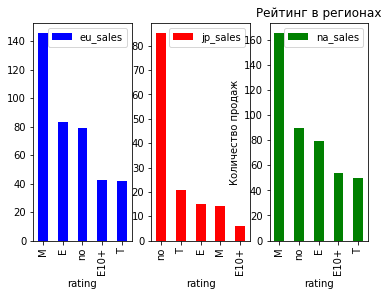

In [32]:
top_genre_region = actual.pivot_table(index='rating', values = ['na_sales','jp_sales','eu_sales'], aggfunc='sum')
top_genre_region.plot.bar(stacked=True)
plt.title("Рейтинг в регионах")
plt.xlabel("рейтинг")
plt.ylabel("Количество продаж")
plt.show()

top5_genre_eu=actual.groupby(by='rating').agg({'eu_sales':'sum'}).sort_values(by='eu_sales', ascending=False).head(5)
top5_genre_jp=actual.groupby(by='rating').agg({'jp_sales':'sum'}).sort_values(by='jp_sales', ascending=False).head(5)
top5_genre_na=actual.groupby(by='rating').agg({'na_sales':'sum'}).sort_values(by='na_sales', ascending=False).head(5)
display(top5_genre_eu, top5_genre_jp, top5_genre_na)

fig, axes = plt.subplots(1, 3)
plt.title("Рейтинг в регионах")
plt.ylabel("Количество продаж")
top5_genre_eu.plot.bar(ax=axes[0], color='b')
top5_genre_jp.plot.bar(ax=axes[1], color='r')
top5_genre_na.plot.bar(ax=axes[2], color='g')

В Европе топ-рейтинг: М (для взрослых), Е (для всех), no (игры без рейтинга), Е10+ (для лиц старше 10 лет), Т (для подростков).
В Америке топ-рейтинг:  М (для взрослых), no (игры без рейтинга), Е (для всех), Е10+ (для лиц старше 10 лет), Т (для подростков).
В Японии на первом месте с существенным отрывом игры без рейтинга. Возможно это связано с тем, что агентство Entertainment Software Rating Board (ESRB) действует в США и Канаде. Скорее всего в Японии своя организация, которая определяет рейтинги видеоигр.

ИТак. Среднестатистический пользователь Европы играет на PS4 в Action игры для взрослых.
Среднестатистический пользователь в Японии играет на 3DS в role-playing игры без определенного рейтинга ESRB.
Среднестатистический пользователь в США играет на PS4 в action игры для взрослых.

### Проверка гипотез


Проверим гипотезу:"Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".
Сформулируем нулевую и анльтернативную гипотезы:

Н0: Средний пользовательский рейтинг платформ Xbox One и PC одинаковый
H1: Средний пользовательский рейтинг платформ Xbox One и PC отличается

In [33]:
xbox = actual[(actual['platform'] == 'XOne')&(actual['user_score'] > 0)]['user_score']
pc = actual[(actual['platform'] == 'PC')&(actual['user_score'] > 0)]['user_score']

alpha= 0.05
display('дисперсии:',st.variation(xbox), st.variation(pc))

results = st.ttest_ind(xbox, pc)

display('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'дисперсии:'

0.21117175955065698

0.27700813763090737

'p-значение:'

0.14012658403611647

'Не получилось отвергнуть нулевую гипотезу'


Р-значение 0,14 означает, что есть 14% (вероятность в процентах), что результат обусловлен случайностью — что не соответствует действительности.
Таким образом, средний пользовательский рейтинг  Xbox One и PC статистически не отличается.

Проверим гипотезу: "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные." 
Сформулируем нулевую и анльтернативную гипотезы:
H0: Средние пользовательские рейтинги жанров Action и Sports равны
H1: Средние пользовательские рейтинги жанров Action и Sports различаются.

In [34]:
action = actual[(actual['genre'] == 'action')&(actual['user_score'] > 0)]['user_score']
sport = actual[(actual['genre'] == 'sports')&(actual['user_score'] > 0)]['user_score']

alpha= 0.05
display('дисперсии',st.variation(action), st.variation(sport))
results2 = st.ttest_ind(xbox, pc,equal_var=False)

display('p-значение:', results2.pvalue)

if (results2.pvalue < alpha):
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу")

'дисперсии'

0.19428975257918113

0.33940490551700886

'p-значение:'

0.14759594013430463

'Не получилось отвергнуть нулевую гипотезу'

Статистически значимой разницы в пользовательских рейтинга жанров Action и Sport - нет.

## Вывод


Люди будут играть в игры всегда. Но до 1993 года рынок технологичных игр слабо развивался, по всей видимости, это было связано с небольшим количеством персональных компьютеров и игровых консолей. НО дальше начался бурный рост, который связан с технологическими прорывами в производстве компьютеров и консолей. Игры становятся красивее и сложнее. Количество продаж их растет. Но мировой финансовый кризис сказался и на рынке продаж компьютерных игр.
Мы выявили, что "средний срок жизни"- срок активных продаж игровой приставки составляет около 10 лет. Пик продаж приходится на 5 лет.
Оценка пользователей слабо влияют на продажи, а вот к оценкам критиков новые покупатели уже прислушиваются.
Лучше всего из всех консолей за время исследований продавалась PS2 в период 2000-2008 года. Но судя по данным, в Европе предпочитают играть на PS, в США - Xbox, в Японии - DS. Каждый регион играет на той консоли, которую и выпускает.
Наиболее популярны игры в жанре action, если смотреть в общем по миру. Но в каждом регионе свои предпочтения. В Японии, например, на первое место по продажам выходят role-playing.
Поэтому строить прогнозы на будущий год необходимо для каждого региона отдельно.
Для Европы - наиболее продаваемыми будут игры для PS4 жанра action, shooter, рейтинга М (для взрослых) и Е,
для Японии - игры для 3DS жанра role-playing, action, misc,
для США - игры для PS4 жанра action, shooter, sports, рейтинг Е(для всех) и М.
